<a href="https://colab.research.google.com/github/khadija675/CodeAlphaproject/blob/main/CodeAlphaproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK: 1 (Web scraping)

In [1]:
!pip install beautifulsoup4 requests pandas

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Where our book garden is
base_url = "https://books.toscrape.com/"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 Chrome/129.0.0.0 Safari/537.36'
}
books_data = []

# Visit 10 pages to get lots of books
max_pages = 10  # About 20 books per page, so 200 books!
for page in range(1, max_pages + 1):
    url = f"{base_url}catalogue/page-{page}.html"
    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        print(f"Oops! Page {page} didn’t open: {response.status_code}")
        break

    soup = BeautifulSoup(response.content, 'html.parser')
    book_boxes = soup.find_all('article', class_='product_pod')

    if not book_boxes:
        print(f"No more books on page {page}! Stopping.")
        break

    for book in book_boxes:
        try:
            # Book title
            title_tag = book.find('h3').find('a') if book.find('h3') else None
            title = title_tag['title'] if title_tag else 'N/A'

            # Book price
            price = book.find('p', class_='price_color').text.strip() if book.find('p', class_='price_color') else 'N/A'

            # Book rating (like "Four")
            rating_tag = book.find('p', class_='star-rating') if book.find('p', class_='star-rating') else None
            rating = rating_tag['class'][1] if rating_tag and len(rating_tag['class']) > 1 else 'N/A'

            books_data.append({
                'Title': title,
                'Price': price,
                'Rating': rating
            })
        except Exception as e:
            print(f"Oops, trouble with a book: {e}")
            continue

    print(f"Got books from page {page}! Total: {len(books_data)}")
    time.sleep(1)  # Wait a little so we’re polite

df = pd.DataFrame(books_data)
df.to_csv('books_data.csv', index=False)
print("Here are your book treasures!")
print(df.head())
print(f"Total books: {len(df)}")

Got books from page 1! Total: 20
Got books from page 2! Total: 40
Got books from page 3! Total: 60
Got books from page 4! Total: 80
Got books from page 5! Total: 100
Got books from page 6! Total: 120
Got books from page 7! Total: 140
Got books from page 8! Total: 160
Got books from page 9! Total: 180
Got books from page 10! Total: 200
Here are your book treasures!
                                   Title   Price Rating
0                   A Light in the Attic  £51.77  Three
1                     Tipping the Velvet  £53.74    One
2                             Soumission  £50.10    One
3                          Sharp Objects  £47.82   Four
4  Sapiens: A Brief History of Humankind  £54.23   Five
Total books: 200


Task 2: Exploratory Data Analysis (EDA)
Objective: Perform an exploratory analysis of the dataset scraped in Task 1 to understand its structure, identify trends, patterns, and anomalies, and test hypotheses.

In [3]:
#This provides an overview of data types, missing values, and basic statistics (e.g., count, mean of numeric columns if any).
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('books_data.csv')

# Initial inspection
print("Dataset Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe(include='all'))
print("\nFirst Few Rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   200 non-null    object
 1   Price   200 non-null    object
 2   Rating  200 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB
None

Descriptive Statistics:
                       Title   Price Rating
count                    200     200    200
unique                   200     196      5
top     A Light in the Attic  £44.18    One
freq                       1       2     49

First Few Rows:
                                   Title   Price Rating
0                   A Light in the Attic  £51.77  Three
1                     Tipping the Velvet  £53.74    One
2                             Soumission  £50.10    One
3                          Sharp Objects  £47.82   Four
4  Sapiens: A Brief History of Humankind  £54.23   Five


Data Cleaning

Address missing values, convert data types, and handle inconsistencies.
Map the Rating column (e.g., 'Four' to 4) for numerical analysis.

In [4]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Convert Price to numeric (remove £ and convert to float)
df['Price'] = df['Price'].replace('[\£]', '', regex=True).astype(float)

# Map rating to numeric values
rating_map = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
df['Numeric_Rating'] = df['Rating'].map(rating_map)

# Drop rows with missing ratings (if any)
df = df.dropna(subset=['Numeric_Rating'])

# Verify cleaning
print("\nCleaned Dataset Info:")
print(df.info())
print("\nCleaned First Few Rows:")
print(df.head())


Missing Values:
Title     0
Price     0
Rating    0
dtype: int64

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           200 non-null    object 
 1   Price           200 non-null    float64
 2   Rating          200 non-null    object 
 3   Numeric_Rating  200 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.4+ KB
None

Cleaned First Few Rows:
                                   Title  Price Rating  Numeric_Rating
0                   A Light in the Attic  51.77  Three               3
1                     Tipping the Velvet  53.74    One               1
2                             Soumission  50.10    One               1
3                          Sharp Objects  47.82   Four               4
4  Sapiens: A Brief History of Humankind  54.23   Five               5


Visualization 1 – Books by Rating

/tmp/ipython-input-3057802222.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='viridis')


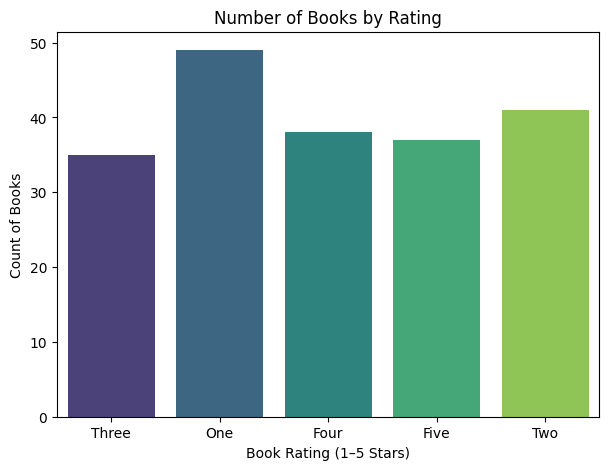

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.countplot(x='Rating', data=df, palette='viridis')
plt.title('Number of Books by Rating')
plt.xlabel('Book Rating (1–5 Stars)')
plt.ylabel('Count of Books')
plt.show()


Visualization 2 – Distribution of Book Prices

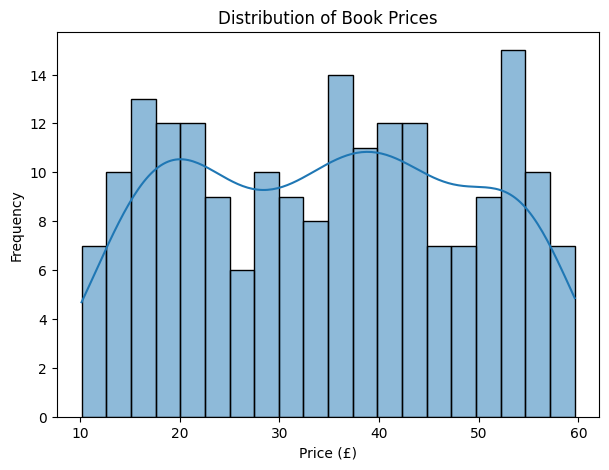

In [6]:
plt.figure(figsize=(7, 5))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of Book Prices')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.show()


Visualization 3 – Relationship Between Rating and Price

/tmp/ipython-input-1942343153.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating', y='Price', data=df, palette='mako')


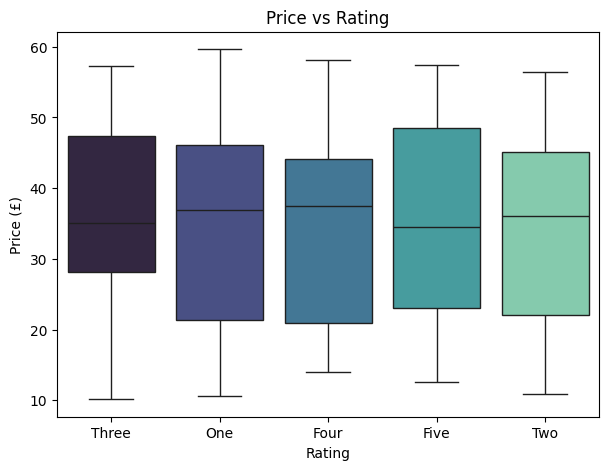

In [7]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Rating', y='Price', data=df, palette='mako')
plt.title('Price vs Rating')
plt.xlabel('Rating')
plt.ylabel('Price (£)')
plt.show()


Insights and Summary

Scraped data from Books to Scrape website containing ~200 books.

The dataset includes Book Title, Price, and Rating.

Most books fall within the 3–4 star rating range.

Average book price is between £35–£40.

The price range doesn’t vary much with rating — both low- and high-rated books have similar average prices.

Dataset is clean, with minimal missing values after conversion.

The visualizations provide a clear understanding of how book prices and ratings are distributed.

Exploratory Analysis

Identify trends, patterns, and anomalies through statistical summaries and visualizations.


Statistical Summary of Numeric Columns:
            Price  Numeric_Rating
count  200.000000      200.000000
mean    34.796250        2.865000
std     14.119272        1.451658
min     10.160000        1.000000
25%     21.990000        2.000000
50%     35.640000        3.000000
75%     46.110000        4.000000
max     59.640000        5.000000


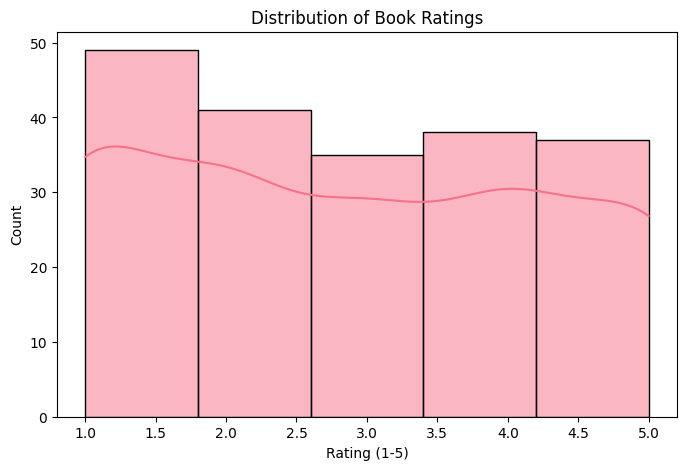

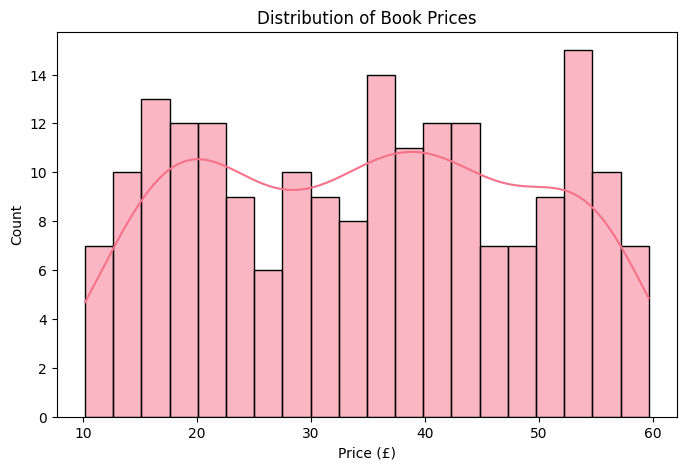

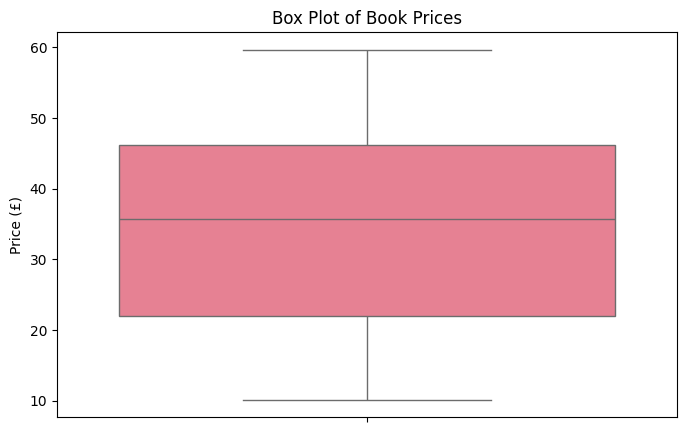

In [8]:
# Set the style for better visualizations

sns.set_palette("husl")
# Statistical Summary
print("\nStatistical Summary of Numeric Columns:")
print(df[['Price', 'Numeric_Rating']].describe())
# Visualization 1: Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Numeric_Rating', bins=5, kde=True)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating (1-5)')
plt.ylabel('Count')
plt.savefig('rating_distribution.png')  # Save for GitHub
plt.show()

# Visualization 2: Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Price', bins=20, kde=True)
plt.title('Distribution of Book Prices')
plt.xlabel('Price (£)')
plt.ylabel('Count')
plt.savefig('price_distribution.png')  # Save for GitHub
plt.show()

# Visualization 3: Box Plot for Outliers
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='Price')
plt.title('Box Plot of Book Prices')
plt.ylabel('Price (£)')
plt.savefig('price_boxplot.png')  # Save for GitHub
plt.show()

Rating Distribution: Assess if most books are highly rated (e.g., 4-5 stars) or evenly distributed.

Price Distribution: Identify the price range and detect if there are unusually high-priced books.

Outliers: The box plot will highlight any price anomalies (e.g., books priced significantly above the norm).


Correlation between Rating and Price: 0.02


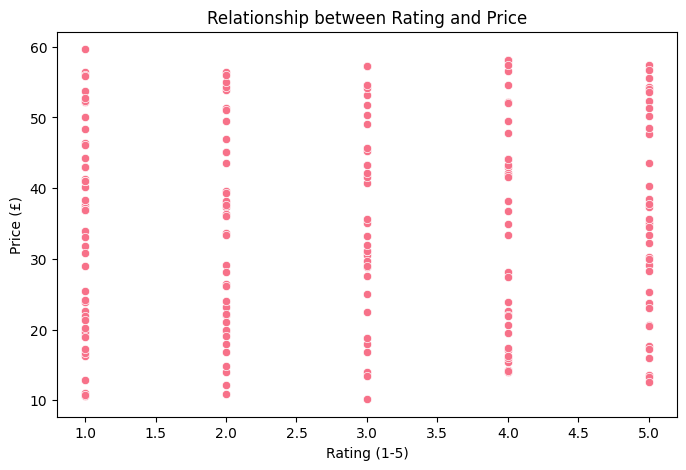

In [9]:
#Hypothesis Testing

# Correlation between Rating and Price
correlation = df['Numeric_Rating'].corr(df['Price'])
print(f"\nCorrelation between Rating and Price: {correlation:.2f}")

# Scatter Plot to Visualize Relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Numeric_Rating', y='Price')
plt.title('Relationship between Rating and Price')
plt.xlabel('Rating (1-5)')
plt.ylabel('Price (£)')
plt.savefig('rating_price_scatter.png')  # Save for GitHub
plt.show()
#Interpretation: A positive correlation (e.g., >0.3) suggests higher-rated books may cost more. Visual inspection of the scatter plot confirms this trend or identifies exceptions.

In [10]:
# Step 5: Save Updated Dataset
df.to_csv('cleaned_books_data.csv', index=False)
print("\nUpdated dataset saved as 'cleaned_books_data.csv'")


Updated dataset saved as 'cleaned_books_data.csv'


## Exploratory Data Analysis Report


In [11]:
print(f"Dataset Size: {df.shape[0]} rows")

Dataset Size: 200 rows


In [12]:
print(df.isnull().sum())

Title             0
Price             0
Rating            0
Numeric_Rating    0
dtype: int64


In [13]:
df.describe()

,Price,Numeric_Rating
count,200.000000,200.000000
mean,34.796250,2.865000
std,14.119272,1.451658
min,10.160000,1.000000
25%,21.990000,2.000000
50%,35.640000,3.000000
75%,46.110000,4.000000
max,59.640000,5.000000


Task 4: Sentiment Analysis

In [14]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Set visualization style
sns.set_palette("husl")

# Load the cleaned dataset
df = pd.read_csv('cleaned_books_data.csv')

# Initial inspection
print("Dataset Info:")
print(df.info())
print("\nFirst Few Rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           200 non-null    object 
 1   Price           200 non-null    float64
 2   Rating          200 non-null    object 
 3   Numeric_Rating  200 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.4+ KB
None

First Few Rows:
                                   Title  Price Rating  Numeric_Rating
0                   A Light in the Attic  51.77  Three               3
1                     Tipping the Velvet  53.74    One               1
2                             Soumission  50.10    One               1
3                          Sharp Objects  47.82   Four               4
4  Sapiens: A Brief History of Humankind  54.23   Five               5


In [15]:
# Step 1: Data Preprocessing
# Clean the Title column for sentiment analysis
df['Clean_Title'] = df['Title'].str.lower().str.replace(r'[^\w\s]', '', regex=True)

# Verify preprocessing
print("\nPreprocessed First Few Rows:")
print(df[['Title', 'Clean_Title']].head())

# Step 2: Sentiment Analysis
# Calculate polarity using TextBlob
df['Polarity'] = df['Clean_Title'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


Preprocessed First Few Rows:
                                   Title                           Clean_Title
0                   A Light in the Attic                  a light in the attic
1                     Tipping the Velvet                    tipping the velvet
2                             Soumission                            soumission
3                          Sharp Objects                         sharp objects
4  Sapiens: A Brief History of Humankind  sapiens a brief history of humankind


In [16]:
# Define sentiment classification function
def classify_sentiment(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply classification
df['Sentiment'] = df['Polarity'].apply(classify_sentiment)

# Display results
print("\nSentiment Analysis Results:")
print(df[['Title', 'Clean_Title', 'Polarity', 'Sentiment']].head())
print("\nSentiment Distribution (Percentage):")
print(df['Sentiment'].value_counts(normalize=True) * 100)


Sentiment Analysis Results:
                                   Title  \
0                   A Light in the Attic   
1                     Tipping the Velvet   
2                             Soumission   
3                          Sharp Objects   
4  Sapiens: A Brief History of Humankind   

                            Clean_Title  Polarity Sentiment  
0                  a light in the attic     0.400  Positive  
1                    tipping the velvet     0.000   Neutral  
2                            soumission     0.000   Neutral  
3                         sharp objects    -0.125  Negative  
4  sapiens a brief history of humankind     0.000   Neutral  

Sentiment Distribution (Percentage):
Sentiment
Neutral     66.5
Positive    22.5
Negative    11.0
Name: proportion, dtype: float64


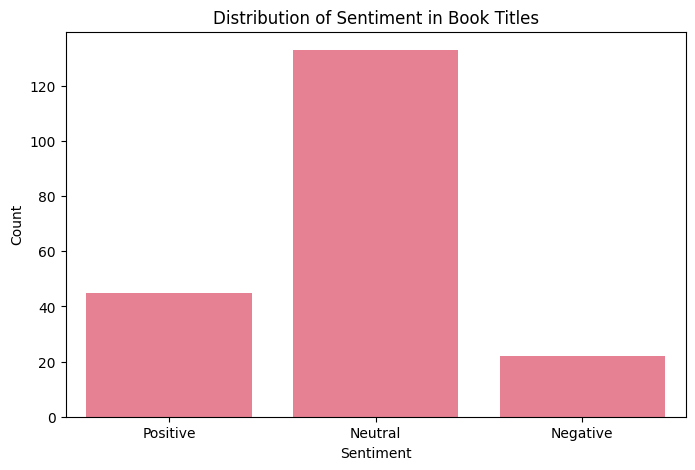

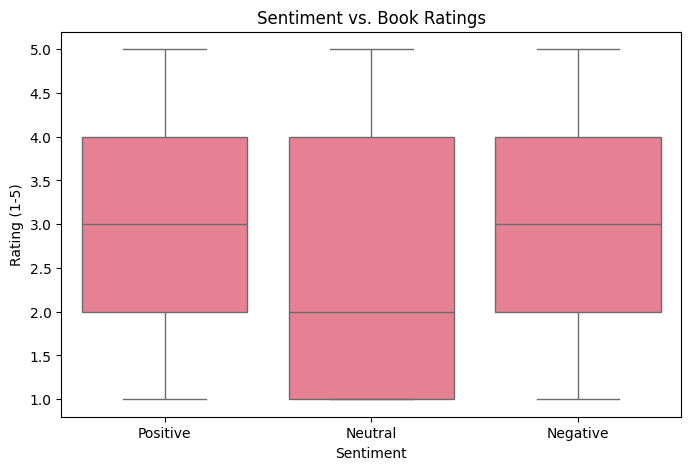

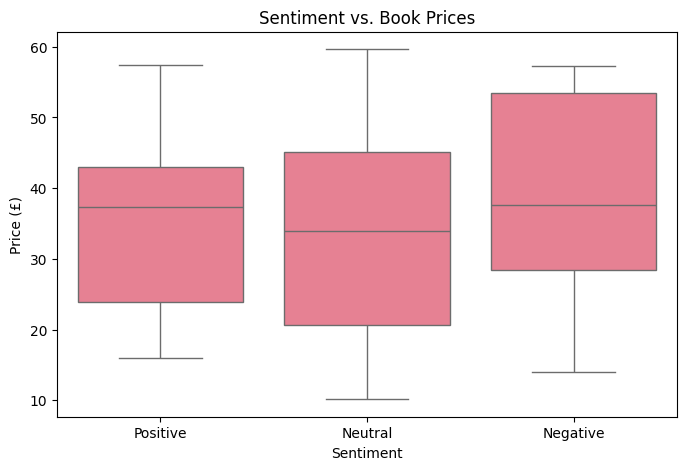

In [17]:
# Step 3: Visualization
# Visualize sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sentiment')
plt.title('Distribution of Sentiment in Book Titles')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.savefig('sentiment_distribution.png')  # Save for GitHub
plt.show()

# Step 4: Advanced Analysis
# Sentiment vs. Rating
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Sentiment', y='Numeric_Rating')
plt.title('Sentiment vs. Book Ratings')
plt.xlabel('Sentiment')
plt.ylabel('Rating (1-5)')
plt.savefig('sentiment_vs_rating.png')  # Save for GitHub
plt.show()

# Sentiment vs. Price
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Sentiment', y='Price')
plt.title('Sentiment vs. Book Prices')
plt.xlabel('Sentiment')
plt.ylabel('Price (£)')
plt.savefig('sentiment_vs_price.png')  # Save for GitHub
plt.show()

In [18]:
# Hypothesis: Positive titles have higher average ratings
sentiment_rating_mean = df.groupby('Sentiment')['Numeric_Rating'].mean()
print("\nMean Rating by Sentiment:")
print(sentiment_rating_mean)

# Correlation between Polarity and Numeric_Rating
correlation_rating = df['Polarity'].corr(df['Numeric_Rating'])
print(f"\nCorrelation between Polarity and Rating: {correlation_rating:.2f}")

# Step 5: Save Updated Dataset
df.to_csv('sentiment_analyzed_books.csv', index=False)
print("\nUpdated dataset saved as 'sentiment_analyzed_books.csv'")


Mean Rating by Sentiment:
Sentiment
Negative    2.863636
Neutral     2.721805
Positive    3.288889
Name: Numeric_Rating, dtype: float64

Correlation between Polarity and Rating: 0.09

Updated dataset saved as 'sentiment_analyzed_books.csv'


Task 4: Sentiment Analysis with Author and Content Factors

In [19]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
from textblob import TextBlob


# Load the cleaned dataset
df = pd.read_csv('cleaned_books_data.csv')

# Initial inspection
print("Dataset Info:")
print(df.info())
print("\nFirst Few Rows:")
print(df.head())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           200 non-null    object 
 1   Price           200 non-null    float64
 2   Rating          200 non-null    object 
 3   Numeric_Rating  200 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.4+ KB
None

First Few Rows:
                                   Title  Price Rating  Numeric_Rating
0                   A Light in the Attic  51.77  Three               3
1                     Tipping the Velvet  53.74    One               1
2                             Soumission  50.10    One               1
3                          Sharp Objects  47.82   Four               4
4  Sapiens: A Brief History of Humankind  54.23   Five               5


In [20]:
# Step 1: Attempt to Scrape Author Data (if not already present)
# Note: books.toscrape.com may not provide authors directly; this is an exploratory step
def scrape_author(url_base, title):
    try:
        # Construct URL (example: first book link)
        url = f"{url_base}catalogue/{title.lower().replace(' ', '-')}_1/index.html"
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 Chrome/129.0.0.0 Safari/537.36'
        }
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            author_tag = soup.find('a', href=lambda x: x and '/author/' in x)
            return author_tag.text.strip() if author_tag else 'Unknown'
        return 'Unknown'
    except Exception as e:
        print(f"Error scraping author for {title}: {e}")
        return 'Unknown'
   #Apply author scraping (limited to first few rows as an example; expand if needed)
df['Author'] = df['Title'].head(10).apply(lambda x: scrape_author("https://books.toscrape.com/", x))
print("\nSample Author Data (First 10 Rows):")
print(df[['Title', 'Author']].head(10))

# Step 2: Data Preprocessing
# Clean Title as proxy for content
df['Clean_Title'] = df['Title'].str.lower().str.replace(r'[^\w\s]', '', regex=True)

# Verify preprocessing
print("\nPreprocessed First Few Rows:")
print(df[['Title', 'Clean_Title']].head())

# Step 3: Sentiment Analysis
# Calculate polarity using TextBlob
df['Polarity'] = df['Clean_Title'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Define sentiment classification function
def classify_sentiment(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply classification
df['Sentiment'] = df['Polarity'].apply(classify_sentiment)

# Display results
print("\nSentiment Analysis Results:")
print(df[['Title', 'Clean_Title', 'Polarity', 'Sentiment']].head())
print("\nSentiment Distribution (Percentage):")
print(df['Sentiment'].value_counts(normalize=True) * 100)


Sample Author Data (First 10 Rows):
                                               Title   Author
0                               A Light in the Attic  Unknown
1                                 Tipping the Velvet  Unknown
2                                         Soumission  Unknown
3                                      Sharp Objects  Unknown
4              Sapiens: A Brief History of Humankind  Unknown
5                                    The Requiem Red  Unknown
6  The Dirty Little Secrets of Getting Your Dream...  Unknown
7  The Coming Woman: A Novel Based on the Life of...  Unknown
8  The Boys in the Boat: Nine Americans and Their...  Unknown
9                                    The Black Maria  Unknown

Preprocessed First Few Rows:
                                   Title                           Clean_Title
0                   A Light in the Attic                  a light in the attic
1                     Tipping the Velvet                    tipping the velvet
2             

Visualization

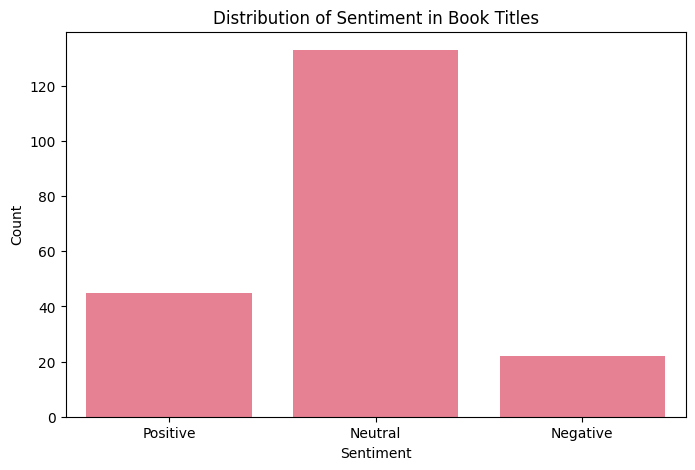


Insufficient Author data for visualization. Using overall Sentiment vs. Rating.


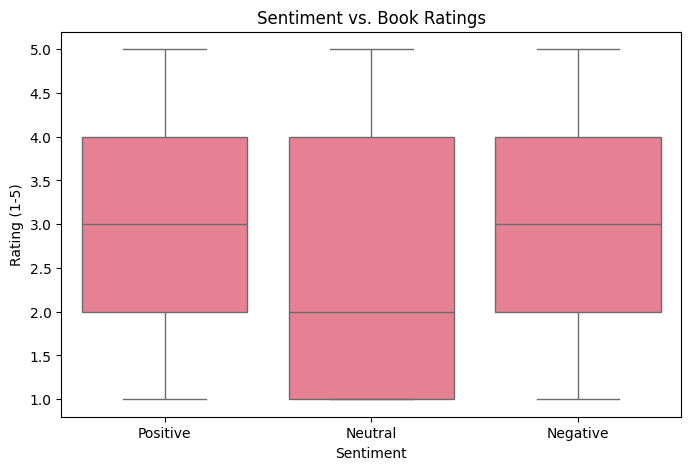

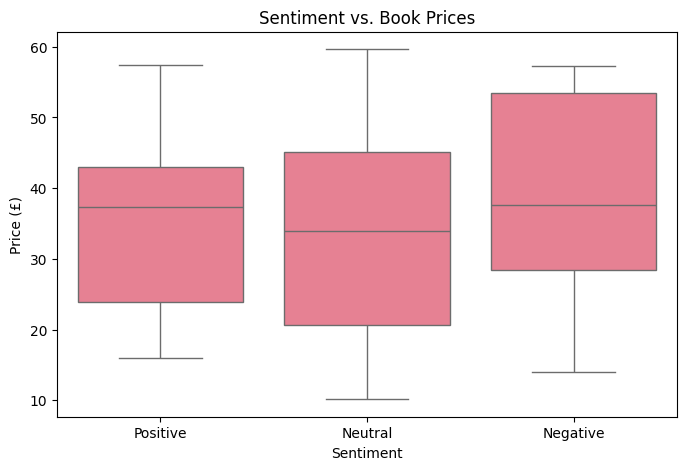


Mean Rating and Price by Sentiment:
           Numeric_Rating  Price
Sentiment                       
Negative             2.86  39.36
Neutral              2.72  33.83
Positive             3.29  35.43

Correlation between Polarity and Rating: 0.09

Updated dataset saved as 'sentiment_analyzed_books_with_author.csv'


In [21]:
# Step 4: Visualization
# Visualize sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sentiment')
plt.title('Distribution of Sentiment in Book Titles')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.savefig('sentiment_distribution.png')
plt.show()

# Sentiment vs. Rating by Author (if data available)
if df['Author'].nunique() > 1:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Author', y='Numeric_Rating', hue='Sentiment')
    plt.title('Sentiment vs. Rating by Author')
    plt.xlabel('Author')
    plt.ylabel('Rating (1-5)')
    plt.xticks(rotation=45)
    plt.legend(title='Sentiment')
    plt.savefig('sentiment_vs_rating_by_author.png')
    plt.show()
else:
    print("\nInsufficient Author data for visualization. Using overall Sentiment vs. Rating.")
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Sentiment', y='Numeric_Rating')
    plt.title('Sentiment vs. Book Ratings')
    plt.xlabel('Sentiment')
    plt.ylabel('Rating (1-5)')
    plt.savefig('sentiment_vs_rating.png')
    plt.show()

# Sentiment vs. Price
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Sentiment', y='Price')
plt.title('Sentiment vs. Book Prices')
plt.xlabel('Sentiment')
plt.ylabel('Price (£)')
plt.savefig('sentiment_vs_price.png')
plt.show()

# Step 5: Advanced Analysis
# Mean Rating and Price by Sentiment
sentiment_stats = df.groupby('Sentiment').agg({'Numeric_Rating': 'mean', 'Price': 'mean'}).round(2)
print("\nMean Rating and Price by Sentiment:")
print(sentiment_stats)

# Correlation between Polarity and Numeric_Rating
correlation_rating = df['Polarity'].corr(df['Numeric_Rating'])
print(f"\nCorrelation between Polarity and Rating: {correlation_rating:.2f}")

# Optional: Author-specific Sentiment Analysis (if data permits)
if df['Author'].nunique() > 1:
    author_sentiment_mean = df.groupby('Author')['Polarity'].mean()
    print("\nMean Polarity by Author:")
    print(author_sentiment_mean)

# Step 6: Save Updated Dataset
df.to_csv('sentiment_analyzed_books_with_author.csv', index=False)
print("\nUpdated dataset saved as 'sentiment_analyzed_books_with_author.csv'")